In [3]:
import pandas as pd

dataset = pd.read_csv(r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist//HAM10000_metadata.csv')
dataset0 = dataset.sort_values('image_id')

In [10]:
import cv2
import numpy as np
import pandas as pd

import os
def load_images_from_folder(folder, index):
    
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        cv2.imwrite(r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\classifiedImgs//' + dataset0.iloc[index]['dx'] + '//' + dataset0.iloc[index]['image_id'] +'.png', img)
        #r = 50 / img.shape[1]
        #dim = (50, int(img.shape[0] * r))
        #resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        index = index + 1
    return index
index = load_images_from_folder(r"C:\Users\7\Desktop\Desktop\dataset\cancer mnist\HAM10000_images_part_1", 0)

# cru

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD, Adam
from keras.models import Sequential,Input,Model,load_model
from keras.layers import Dense, Dropout, Flatten, GaussianNoise
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img

def preprocess_input_vgg(x):
    """Wrapper around keras.applications.vgg16.preprocess_input()
    to make it compatible for use with keras.preprocessing.image.ImageDataGenerator's
    `preprocessing_function` argument.
    
    Parameters
    ----------
    x : a numpy 3darray (a single image to be preprocessed)
    
    Note we cannot pass keras.applications.vgg16.preprocess_input()
    directly to to keras.preprocessing.image.ImageDataGenerator's
    `preprocessing_function` argument because the former expects a
    4D tensor whereas the latter expects a 3D tensor. Hence the
    existence of this wrapper.
    
    Returns a numpy 3darray (the preprocessed image).
    
    """
    from keras.applications.vgg16 import preprocess_input
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X[0]

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(directory=r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\balanced\train',
                                                    target_size=[28,28],
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)
validation_generator = validation_datagen.flow_from_directory(directory=r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\balanced\test',
                                                              target_size=[28,28],
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 546 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [3]:
skncancer_model = Sequential()
num_classes = 6
activ = keras.layers.LeakyReLU(alpha=0.3)

In [4]:
skncancer_model.add(Conv2D(64, (3,3), input_shape = (28,28, 3), activation='relu', padding='same'))

skncancer_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))

skncancer_model.add(MaxPooling2D((2, 2), strides=2,padding='same'))

skncancer_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))

skncancer_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))

skncancer_model.add(MaxPooling2D((2, 2), strides=2,padding='same'))

skncancer_model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

skncancer_model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

skncancer_model.add(MaxPooling2D((2, 2), strides=2,padding='same'))

skncancer_model.add(Conv2D(512, (3,3), activation='relu', padding='same'))

skncancer_model.add(Conv2D(512, (3,3), activation='relu', padding='same'))

skncancer_model.add(MaxPooling2D((2, 2), strides=2,padding='same'))

skncancer_model.add(Conv2D(512, (3,3), activation='relu', padding='same'))

skncancer_model.add(Conv2D(512, (3,3), activation='relu', padding='same'))

skncancer_model.add(MaxPooling2D((2, 2), strides=2,padding='same'))

skncancer_model.add(Flatten())

skncancer_model.add(Dense(2048, activation='relu'))
skncancer_model.add(Dropout(0.4))
skncancer_model.add(Dense(1024, activation='relu'))
skncancer_model.add(Dropout(0.4))
skncancer_model.add(Dense(activation='softmax', units = num_classes))

In [5]:
adam = Adam(lr=0.0025, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
skncancer_model.compile(optimizer = 'sgd', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [6]:
skncancer_model.fit_generator(train_generator,
                        steps_per_epoch=64,
                        epochs=100,
                        validation_data=validation_generator,
                        validation_steps=32)

Epoch 1/100
64/64 [==============================] - 23s 356ms/step - loss: 1.7753 - acc: 0.2124 - val_loss: 1.6838 - val_acc: 0.2457
Epoch 2/100
64/64 [==============================] - 21s 326ms/step - loss: 1.6999 - acc: 0.2423 - val_loss: 1.5900 - val_acc: 0.3610
Epoch 3/100
64/64 [==============================] - 20s 320ms/step - loss: 1.6475 - acc: 0.3217 - val_loss: 1.6404 - val_acc: 0.3004
Epoch 4/100
64/64 [==============================] - 21s 333ms/step - loss: 1.5944 - acc: 0.3401 - val_loss: 1.6109 - val_acc: 0.3362
Epoch 5/100
64/64 [==============================] - 20s 307ms/step - loss: 1.6075 - acc: 0.3271 - val_loss: 1.5098 - val_acc: 0.4090
Epoch 6/100
64/64 [==============================] - 21s 335ms/step - loss: 1.5393 - acc: 0.3464 - val_loss: 1.7328 - val_acc: 0.2543
Epoch 7/100
64/64 [==============================] - 20s 310ms/step - loss: 1.4747 - acc: 0.3790 - val_loss: 1.4557 - val_acc: 0.4116
Epoch 8/100
64/64 [==============================] - 23s 358ms

Epoch 62/100
64/64 [==============================] - 23s 361ms/step - loss: 0.7261 - acc: 0.7147 - val_loss: 0.9415 - val_acc: 0.7004
Epoch 63/100
64/64 [==============================] - 21s 335ms/step - loss: 1.4938 - acc: 0.4827 - val_loss: 1.1582 - val_acc: 0.5680
Epoch 64/100
64/64 [==============================] - 20s 310ms/step - loss: 1.0885 - acc: 0.5993 - val_loss: 1.1896 - val_acc: 0.5269
Epoch 65/100
64/64 [==============================] - 21s 322ms/step - loss: 1.0015 - acc: 0.6175 - val_loss: 0.9427 - val_acc: 0.5976
Epoch 66/100
64/64 [==============================] - 20s 311ms/step - loss: 0.8638 - acc: 0.6658 - val_loss: 1.2834 - val_acc: 0.6088
Epoch 67/100
64/64 [==============================] - 22s 340ms/step - loss: 0.8787 - acc: 0.6653 - val_loss: 1.1137 - val_acc: 0.6185
Epoch 68/100
64/64 [==============================] - 21s 329ms/step - loss: 1.0658 - acc: 0.5833 - val_loss: 0.9347 - val_acc: 0.6349
Epoch 69/100
64/64 [==============================] - 2

In [11]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

predict_gen = validation_datagen.flow_from_directory(directory=r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\balanced\test',
                                                              target_size=[28,28],
                                                              batch_size=144,
                                                              class_mode='categorical')

X_val_sample, res = next(predict_gen)
y_pred = skncancer_model.predict(X_val_sample)

CM = []
for i in range(6):
    CM.append([0, 0, 0, 0, 0, 0])


Found 144 images belonging to 6 classes.


In [12]:
for x, y in zip(res, y_pred):
    CM[np.argmax(x)][np.argmax(y)] = CM[np.argmax(x)][np.argmax(y)] + 1
    #s = pd.Series({'Afr': y[0], 'Asi': y[1], 'Brc':y[2], 'Ind':y[3], 'Lat':y[4]})
    #axes = s.plot(kind='bar')
    #axes.set_xlabel('Class')
    #axes.set_ylabel('Probability')
    #axes.set_ylim([0, 1])
    #plt.show()
for line in CM:
    print(line)
    #img = array_to_img(x)
    #print(res[index])
    #display(img)

skncancer_model.evaluate_generator(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)

[15, 1, 3, 5, 0, 0]
[8, 12, 1, 2, 0, 1]
[6, 0, 14, 3, 1, 0]
[3, 0, 3, 18, 0, 0]
[2, 0, 1, 5, 16, 0]
[0, 0, 0, 0, 0, 24]
5/5 [==============================] - 1s 214ms/step


[1.1222016281551785, 0.6875]

In [11]:
skncancer_model.save(r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\models\bal-raw-100epc-6482.h5')

In [13]:
onedtrue = []
onedpred = []
for true, pred in zip(res, y_pred):
    onedtrue.append(np.argmax(true))
    onedpred.append(np.argmax(pred))

In [14]:
from sklearn.metrics import classification_report
target_names = ['akiec', 'bcc', 'bkl', 'mel', 'nv', 'vasc']
print(classification_report(onedtrue, onedpred, target_names=target_names))

              precision    recall  f1-score   support

       akiec       0.44      0.62      0.52        24
         bcc       0.92      0.50      0.65        24
         bkl       0.64      0.58      0.61        24
         mel       0.55      0.75      0.63        24
          nv       0.94      0.67      0.78        24
        vasc       0.96      1.00      0.98        24

   micro avg       0.69      0.69      0.69       144
   macro avg       0.74      0.69      0.69       144
weighted avg       0.74      0.69      0.69       144



In [13]:
from keras.applications.vgg16 import preprocess_input
X = np.expand_dims(x, axis=0)
X = preprocess_input(X)
X

array([[-207.878, -233.558, -247.36 ,    0.   ,    0.   ,    0.   ,
           1.   ]], dtype=float32)

In [1]:
from keras.models import load_model
model = load_model(r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\models\raw-200epc-6149')

Using TensorFlow backend.


# vgg-16

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD, Adam
from keras.models import Sequential,Input,Model,load_model
from keras.layers import Dense, Dropout, Flatten, GaussianNoise
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [2]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout

vgg16 = VGG16(weights='imagenet')
x = vgg16.get_layer('fc1').output
x = BatchNormalization(name = 'BatchNormalization_0')(x)
x = Dropout(0.3, name = 'dropout0')(x)
x = vgg16.get_layer('fc2')(x)
x = BatchNormalization(name = 'BatchNormalization_1')(x)
x = Dropout(0.3, name = 'dropout1')(x)
prediction = Dense(output_dim=6, activation='softmax', name='prediction')(x)
model = Model(input=vgg16.input, output=prediction)

C:\Users\7\Anaconda3\envs\tg-gpu-ptchd\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", name="prediction", units=6)`
  if sys.path[0] == '':
C:\Users\7\Anaconda3\envs\tg-gpu-ptchd\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  del sys.path[0]


In [3]:
import pandas as pd
for layer in model.layers:
    if layer.name in ['fc1', 'fc2', 'prediction', 'dropout0', 'dropout1', 'flatten',
                      'block5_pool', 'block5_conv3', 'block5_conv2', 'block5_conv1',
                      'block4_pool', 'block4_conv3', 'block4_conv2',
                      'BatchNormalization_0', 'BatchNormalization_1']:
        continue
    layer.trainable = False

df = pd.DataFrame(([layer.name, layer.trainable] for layer in model.layers), columns=['layer', 'trainable'])
df.style.applymap(lambda trainable: f'background-color: {"yellow" if trainable else "red"}', subset=['trainable'])

,layer,trainable
0,input_1,False
1,block1_conv1,False
2,block1_conv2,False
3,block1_pool,False
4,block2_conv1,False
5,block2_conv2,False
6,block2_pool,False
7,block3_conv1,False
8,block3_conv2,False
9,block3_conv3,False


In [4]:
from keras.optimizers import SGD, Adam

sgd = SGD(lr=1e-4, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img

def preprocess_input_vgg(x):
    """Wrapper around keras.applications.vgg16.preprocess_input()
    to make it compatible for use with keras.preprocessing.image.ImageDataGenerator's
    `preprocessing_function` argument.
    
    Parameters
    ----------
    x : a numpy 3darray (a single image to be preprocessed)
    
    Note we cannot pass keras.applications.vgg16.preprocess_input()
    directly to to keras.preprocessing.image.ImageDataGenerator's
    `preprocessing_function` argument because the former expects a
    4D tensor whereas the latter expects a 3D tensor. Hence the
    existence of this wrapper.
    
    Returns a numpy 3darray (the preprocessed image).
    
    """
    from keras.applications.vgg16 import preprocess_input
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X[0]

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(directory=r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\balanced\train',
                                                    target_size=[224,224],
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)
validation_generator = validation_datagen.flow_from_directory(directory=r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\balanced\test',
                                                              target_size=[224,224],
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 546 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [6]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=64,
                    nb_epoch=30,
                    validation_data=validation_generator,
                    validation_steps=32)

C:\Users\7\Anaconda3\envs\tg-gpu-ptchd\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\7\Anaconda3\envs\tg-gpu-ptchd\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=64, validation_data=<keras_pre..., validation_steps=32, epochs=30)`
  """


Epoch 1/30
64/64 [==============================] - 50s 784ms/step - loss: 1.9727 - acc: 0.3097 - val_loss: 4.6298 - val_acc: 0.1713
Epoch 2/30
64/64 [==============================] - 45s 696ms/step - loss: 1.8763 - acc: 0.3318 - val_loss: 6.7498 - val_acc: 0.1703
Epoch 3/30
64/64 [==============================] - 41s 645ms/step - loss: 1.9079 - acc: 0.3063 - val_loss: 6.2986 - val_acc: 0.1798
Epoch 4/30
64/64 [==============================] - 46s 716ms/step - loss: 1.9054 - acc: 0.3318 - val_loss: 4.1670 - val_acc: 0.1950
Epoch 5/30
64/64 [==============================] - 41s 648ms/step - loss: 1.9194 - acc: 0.3046 - val_loss: 2.7374 - val_acc: 0.2511
Epoch 6/30
64/64 [==============================] - 45s 711ms/step - loss: 1.8683 - acc: 0.3019 - val_loss: 2.5469 - val_acc: 0.1498
Epoch 7/30
64/64 [==============================] - 44s 682ms/step - loss: 1.7965 - acc: 0.3387 - val_loss: 1.9100 - val_acc: 0.2823
Epoch 8/30
64/64 [==============================] - 47s 736ms/step - 

In [7]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

predict_gen = validation_datagen.flow_from_directory(directory=r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\balanced\test',
                                                              target_size=[224, 224],
                                                              batch_size=144,
                                                              class_mode='categorical')

X_val_sample, res = next(predict_gen)
y_pred = model.predict(X_val_sample)

CM = []
for i in range(6):
    CM.append([0, 0, 0, 0, 0, 0])


Found 144 images belonging to 6 classes.


In [8]:
for x, y in zip(res, y_pred):
    CM[np.argmax(x)][np.argmax(y)] = CM[np.argmax(x)][np.argmax(y)] + 1
    #s = pd.Series({'Afr': y[0], 'Asi': y[1], 'Brc':y[2], 'Ind':y[3], 'Lat':y[4]})
    #axes = s.plot(kind='bar')
    #axes.set_xlabel('Class')
    #axes.set_ylabel('Probability')
    #axes.set_ylim([0, 1])
    #plt.show()
for line in CM:
    print(line)
    #img = array_to_img(x)
    #print(res[index])
    #display(i
model.evaluate_generator(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)

[16, 8, 0, 0, 0, 0]
[8, 14, 0, 1, 0, 1]
[12, 2, 6, 2, 1, 1]
[13, 6, 3, 0, 1, 1]
[6, 1, 2, 0, 14, 1]
[3, 3, 1, 0, 7, 10]
5/5 [==============================] - 1s 251ms/step


[1.4585097365909152, 0.4166666666666667]

In [9]:
onedtrue = []
onedpred = []
for true, pred in zip(res, y_pred):
    onedtrue.append(np.argmax(true))
    onedpred.append(np.argmax(pred))

In [10]:
from sklearn.metrics import classification_report
target_names = ['akiec', 'bcc', 'bkl', 'mel', 'nv', 'vasc']
print(classification_report(onedtrue, onedpred, target_names=target_names))

              precision    recall  f1-score   support

       akiec       0.28      0.67      0.39        24
         bcc       0.41      0.58      0.48        24
         bkl       0.50      0.25      0.33        24
         mel       0.00      0.00      0.00        24
          nv       0.61      0.58      0.60        24
        vasc       0.71      0.42      0.53        24

   micro avg       0.42      0.42      0.42       144
   macro avg       0.42      0.42      0.39       144
weighted avg       0.42      0.42      0.39       144



In [11]:
model.save('bal-vgg16-4166-30epc.h5')

# inception v3

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD, Adam
from keras.models import Sequential,Input,Model,load_model
from keras.layers import Dense, Dropout, Flatten, GaussianNoise
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [1]:
from keras.applications.inception_v3 import InceptionV3
inception_model = InceptionV3(weights='imagenet', include_top=False)

Using TensorFlow backend.


In [2]:
for i,layer in enumerate(inception_model.layers):
    print(i,layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img

def preprocess_input_vgg(x):
    """Wrapper around keras.applications.vgg16.preprocess_input()
    to make it compatible for use with keras.preprocessing.image.ImageDataGenerator's
    `preprocessing_function` argument.
    
    Parameters
    ----------
    x : a numpy 3darray (a single image to be preprocessed)
    
    Note we cannot pass keras.applications.vgg16.preprocess_input()
    directly to to keras.preprocessing.image.ImageDataGenerator's
    `preprocessing_function` argument because the former expects a
    4D tensor whereas the latter expects a 3D tensor. Hence the
    existence of this wrapper.
    
    Returns a numpy 3darray (the preprocessed image).
    
    """
    from keras.applications.inception_v3 import preprocess_input
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X[0]

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(directory=r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\unbalanced\train',
                                                    target_size=[140, 140],
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)
validation_generator = validation_datagen.flow_from_directory(directory=r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\unbalanced\test',
                                                              target_size=[140, 140],
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 2324 images belonging to 6 classes.
Found 506 images belonging to 6 classes.


In [3]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
inc_model = InceptionV3(weights='imagenet', include_top=False)

# get layers and add average pooling layer
x = inc_model.output
x = GlobalAveragePooling2D()(x)

# add fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
# add output layer
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=inc_model.input, outputs=predictions)

# freeze pre-trained model area's layer
for layer in inc_model.layers:
    layer.trainable = False

# update the weight that are added
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'] )
model.fit_generator(train_generator,
                    steps_per_epoch=64,
                    nb_epoch=1,
                    validation_data=validation_generator,
                    validation_steps=32)

# choose the layers which are updated by training
#layer_num = len(model.layers)
#for layer in model.layers[:248]:
#    layer.trainable = False

for layer in model.layers:
    layer.trainable = True

# training
model.compile(optimizer=SGD(lr=1e-4, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\7\Anaconda3\envs\tg-gpu-ptchd\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\7\Anaconda3\envs\tg-gpu-ptchd\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=64, validation_data=<keras_pre..., validation_steps=32, epochs=1)`


Epoch 1/1
64/64 [==============================] - 72s 1s/step - loss: 2.5725 - acc: 0.2785 - val_loss: 1.8843 - val_acc: 0.2589


In [19]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=64,
                    nb_epoch=25,
                    shuffle = True,
                    validation_data=validation_generator,
                    validation_steps=16)

C:\Users\7\Anaconda3\envs\tg-gpu-ptchd\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\7\Anaconda3\envs\tg-gpu-ptchd\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=64, shuffle=True, validation_data=<keras_pre..., validation_steps=16, epochs=25)`
  


Epoch 1/25
64/64 [==============================] - 27s 423ms/step - loss: 0.4788 - acc: 0.8316 - val_loss: 0.8885 - val_acc: 0.7213
Epoch 2/25
64/64 [==============================] - 26s 403ms/step - loss: 0.4918 - acc: 0.8273 - val_loss: 0.8449 - val_acc: 0.7095
Epoch 3/25
64/64 [==============================] - 26s 400ms/step - loss: 0.4811 - acc: 0.8270 - val_loss: 0.8331 - val_acc: 0.7194
Epoch 4/25
64/64 [==============================] - 28s 434ms/step - loss: 0.4375 - acc: 0.8398 - val_loss: 0.8371 - val_acc: 0.7095
Epoch 5/25
64/64 [==============================] - 27s 416ms/step - loss: 0.4668 - acc: 0.8284 - val_loss: 0.8496 - val_acc: 0.7115
Epoch 6/25
64/64 [==============================] - 28s 433ms/step - loss: 0.4635 - acc: 0.8389 - val_loss: 0.8548 - val_acc: 0.7095
Epoch 7/25
64/64 [==============================] - 27s 422ms/step - loss: 0.4519 - acc: 0.8334 - val_loss: 0.8794 - val_acc: 0.7154
Epoch 8/25
64/64 [==============================] - 28s 439ms/step - 

In [3]:
model = load_model(r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\models\bal-icpt-100epcs-7083')

In [4]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

predict_gen = validation_datagen.flow_from_directory(directory=r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\balanced\test',
                                                              target_size=[140,140],
                                                              batch_size=144,
                                                              class_mode='categorical')

X_val_sample, res = next(predict_gen)
y_pred = model.predict(X_val_sample)

CM = []
for i in range(6):
    CM.append([0, 0, 0, 0, 0, 0])


Found 144 images belonging to 6 classes.


In [5]:
for x, y in zip(res, y_pred):
    CM[np.argmax(x)][np.argmax(y)] = CM[np.argmax(x)][np.argmax(y)] + 1
    #s = pd.Series({'Afr': y[0], 'Asi': y[1], 'Brc':y[2], 'Ind':y[3], 'Lat':y[4]})
    #axes = s.plot(kind='bar')
    #axes.set_xlabel('Class')
    #axes.set_ylabel('Probability')
    #axes.set_ylim([0, 1])
    #plt.show()
for line in CM:
    print(line)
    #img = array_to_img(x)
    #print(res[index])
    #display(i
model.evaluate_generator(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)

[9, 5, 6, 4, 0, 0]
[3, 16, 3, 2, 0, 0]
[3, 2, 18, 0, 1, 0]
[1, 0, 5, 15, 3, 0]
[1, 0, 2, 1, 20, 0]
[0, 0, 0, 0, 0, 24]
16/16 [==============================] - 14s 850ms/step


[0.8169493687011508, 0.7924901192838495]

In [6]:
onedtrue = []
onedpred = []
for true, pred in zip(res, y_pred):
    onedtrue.append(np.argmax(true))
    onedpred.append(np.argmax(pred))

In [7]:
from sklearn.metrics import classification_report
target_names = ['akiec', 'bcc', 'bkl', 'mel', 'nv', 'vasc']
print(classification_report(onedtrue, onedpred, target_names=target_names))

              precision    recall  f1-score   support

       akiec       0.53      0.38      0.44        24
         bcc       0.70      0.67      0.68        24
         bkl       0.53      0.75      0.62        24
         mel       0.68      0.62      0.65        24
          nv       0.83      0.83      0.83        24
        vasc       1.00      1.00      1.00        24

   micro avg       0.71      0.71      0.71       144
   macro avg       0.71      0.71      0.70       144
weighted avg       0.71      0.71      0.70       144



In [17]:
model.save(r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\models\unbal-icpt-100epcs-7233')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


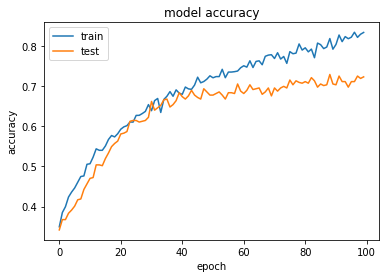

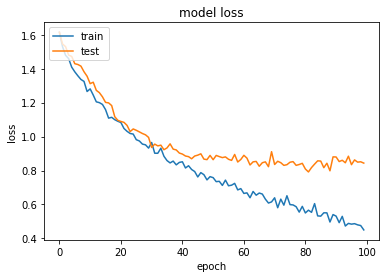

In [18]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# teste

In [12]:
from keras.models import load_model
model = load_model(r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\models//bal-icpt-100epcs-7083')

In [13]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

predict_gen = validation_datagen.flow_from_directory(directory=r'C:\Users\7\Desktop\Desktop\dataset\cancer mnist\balanced\test',
                                                              target_size=[224,224],
                                                              batch_size=144,
                                                              class_mode='categorical')

X_val_sample, res = next(predict_gen)
y_pred = model.predict(X_val_sample)

CM = []
for i in range(6):
    CM.append([0, 0, 0, 0, 0, 0])


Found 144 images belonging to 6 classes.


In [14]:
for x, y in zip(res, y_pred):
    CM[np.argmax(x)][np.argmax(y)] = CM[np.argmax(x)][np.argmax(y)] + 1
    #s = pd.Series({'Afr': y[0], 'Asi': y[1], 'Brc':y[2], 'Ind':y[3], 'Lat':y[4]})
    #axes = s.plot(kind='bar')
    #axes.set_xlabel('Class')
    #axes.set_ylabel('Probability')
    #axes.set_ylim([0, 1])
    #plt.show()
for line in CM:
    print(line)
    #img = array_to_img(x)
    #print(res[index])
    #display(i
model.evaluate_generator(predict_gen, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)

[0, 0, 8, 1, 0, 15]
[0, 0, 6, 2, 0, 16]
[0, 0, 7, 2, 0, 15]
[0, 0, 13, 1, 0, 10]
[0, 0, 11, 2, 0, 11]
[0, 0, 3, 1, 0, 20]
1/1 [==============================] - 4s 4s/step


[12.577461242675781, 0.1944444477558136]

In [ ]:
onedtrue = []
onedpred = []
for true, pred in zip(res, y_pred):
    onedtrue.append(np.argmax(true))
    onedpred.append(np.argmax(pred))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['akiec', 'bcc', 'bkl', 'mel', 'nv', 'vasc']
print(classification_report(onedtrue, onedpred, target_names=target_names))